In [1]:
from scipy.ndimage import correlate
from skimage import color, io, measure, img_as_ubyte, exposure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [2]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [3]:
weights = [[0, 1, 0],
           [1, 2, 1],
           [0, 1, 0]]

In [4]:
res_img = correlate(input_img, weights)

## Exercise 1

In [5]:
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


In [6]:
print(res_img[3][3])

108


## Exercise 2

In [7]:
res_img = correlate(input_img, weights, mode="constant", cval=10)

In [8]:
print(res_img)

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


## Exercise 3 - Mean Filtering

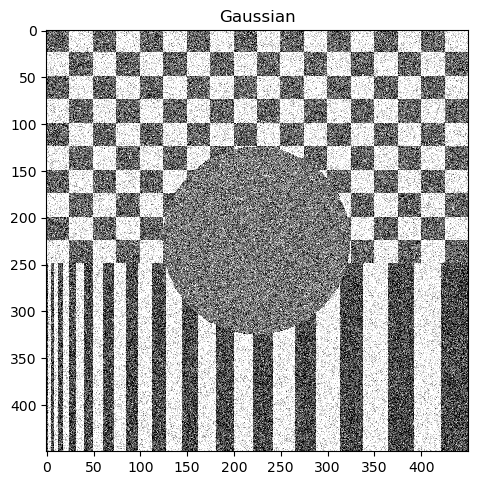

In [9]:
# Directory containing data and images
in_dir = "data/"
im_name = "Gaussian.png"

im_org = io.imread(in_dir + im_name)

io.imshow(im_org)
plt.title('Gaussian')
io.show()

In [10]:
size = 5
# Two dimensional filter filled with 1
weights = np.ones([size, size])
# Normalize weights
weights = weights / np.sum(weights)

In [11]:
res_img = correlate(im_org, weights)

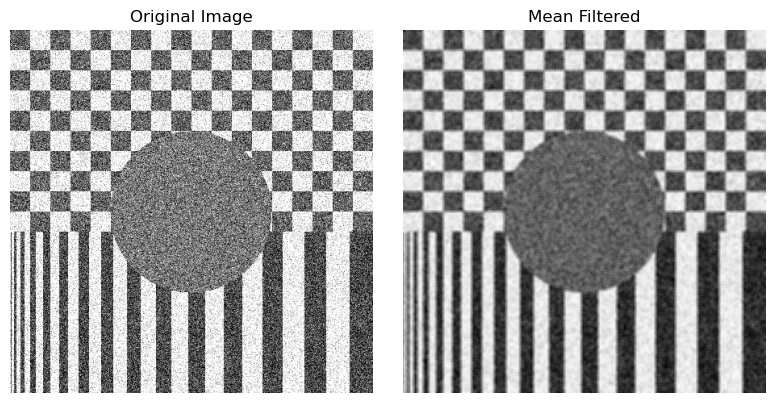

In [12]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(im_org, cmap='gray')
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(res_img, cmap='gray')
ax1.set_title("Mean Filtered")
ax1.axis('off')

fig.tight_layout()
io.show()

In [13]:
weights = np.ones([10, 10])
weights = weights / np.sum(weights)
res_img_10 = correlate(im_org, weights)
weights = np.ones([20, 20])
weights = weights / np.sum(weights)
res_img_20 = correlate(im_org, weights)

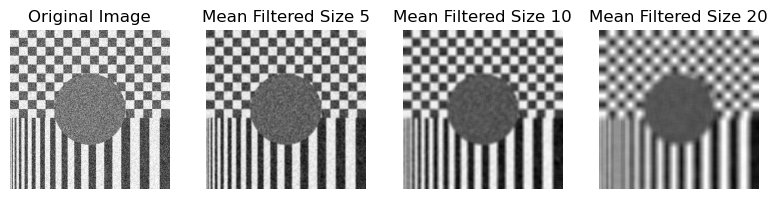

In [14]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))
ax0.imshow(im_org, cmap='gray')
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(res_img, cmap='gray')
ax1.set_title("Mean Filtered Size 5")
ax1.axis('off')
ax2.imshow(res_img_10, cmap='gray')
ax2.set_title("Mean Filtered Size 10")
ax2.axis('off')
ax3.imshow(res_img_20, cmap='gray')
ax3.set_title("Mean Filtered Size 20")
ax3.axis('off')

fig.tight_layout()
io.show()

## Exercise 4 - Median Filtering

In [15]:
from skimage.filters import median

In [16]:
size = 5
footprint = np.ones([size, size])
med_img_5 = median(im_org, footprint)
size = 10
footprint = np.ones([size, size])
med_img_10 = median(im_org, footprint)
size = 20
footprint = np.ones([size, size])
med_img_20 = median(im_org, footprint)

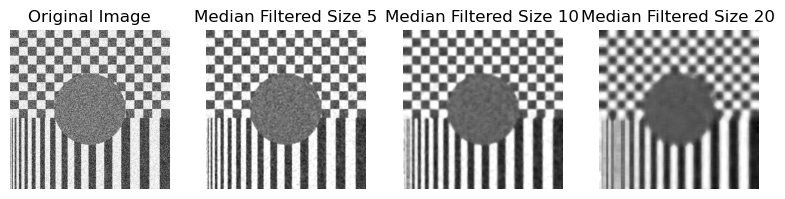

In [17]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))
ax0.imshow(im_org, cmap='gray')
ax0.set_title("Original Image")
ax0.axis('off')
ax1.imshow(med_img_5, cmap='gray')
ax1.set_title("Median Filtered Size 5")
ax1.axis('off')
ax2.imshow(med_img_10, cmap='gray')
ax2.set_title("Median Filtered Size 10")
ax2.axis('off')
ax3.imshow(med_img_20, cmap='gray')
ax3.set_title("Median Filtered Size 20")
ax3.axis('off')

fig.tight_layout()
io.show()

## Exercise 5 - Comparing mean and median filtering

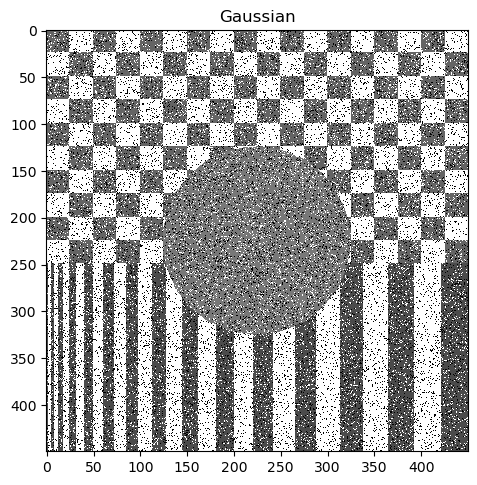

In [18]:
im_org = io.imread(in_dir + 'SaltPepper.png')

io.imshow(im_org)
plt.title('Gaussian')
io.show()

In [19]:
size = 5
footprint = np.ones([size, size])
med_img_5 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_5 = correlate(im_org, weights)

size = 10
footprint = np.ones([size, size])
med_img_10 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_10 = correlate(im_org, weights)

size = 20
footprint = np.ones([size, size])
med_img_20 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_20 = correlate(im_org, weights)

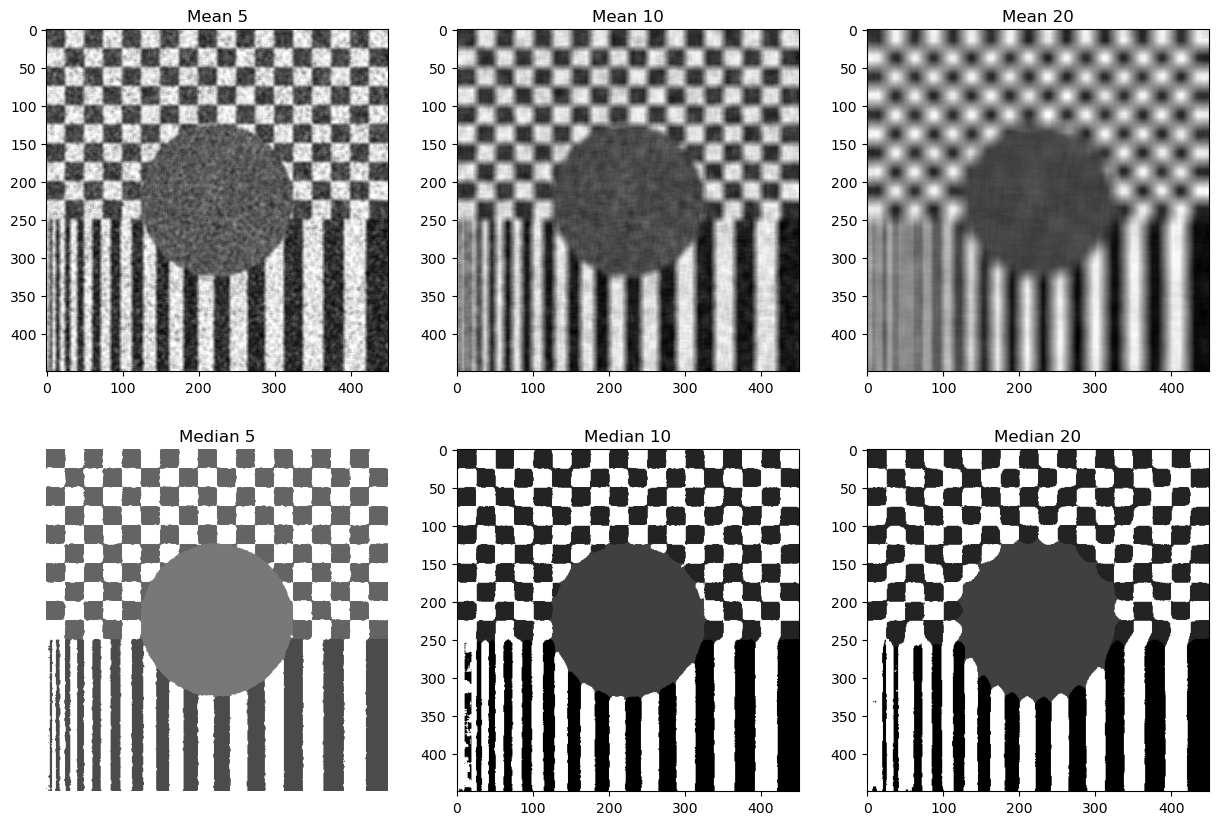

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

ax[0,0].imshow(mean_img_5, cmap = 'gray')
ax[0,0].set_title('Mean 5')
ax[0,1].imshow(mean_img_10, cmap = 'gray')
ax[0,1].set_title('Mean 10')
ax[0,2].imshow(mean_img_20, cmap = 'gray')
ax[0,2].set_title('Mean 20')
ax[1,0].set_axis_off()
ax[1,0].imshow(med_img_5, cmap = 'gray')
ax[1,0].set_title('Median 5')
ax[1,1].imshow(med_img_10, cmap = 'gray')
ax[1,1].set_title('Median 10')
ax[1,2].imshow(med_img_20, cmap = 'gray')
ax[1,2].set_title('Median 20')
plt.show()

## Exercise 6 - Gaussian filter

In [21]:
from skimage.filters import gaussian

In [22]:
sigma = 2
gauss_img_2 = gaussian(im_org, sigma)
gauss_img_5 = gaussian(im_org, 5)
gauss_img_1 = gaussian(im_org, 1)

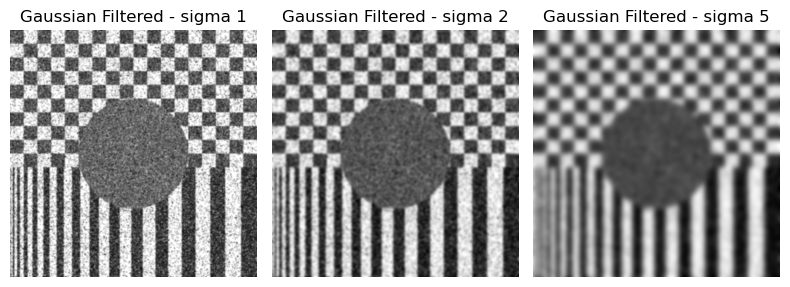

In [23]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 3))
ax0.imshow(gauss_img_1, cmap='gray')
ax0.set_title("Gaussian Filtered - sigma 1")
ax0.axis('off')
ax1.imshow(gauss_img_2, cmap='gray')
ax1.set_title("Gaussian Filtered - sigma 2")
ax1.axis('off')
ax2.imshow(gauss_img_5, cmap='gray')
ax2.set_title("Gaussian Filtered - sigma 5")
ax2.axis('off')

fig.tight_layout()
io.show()

## Exercise 7

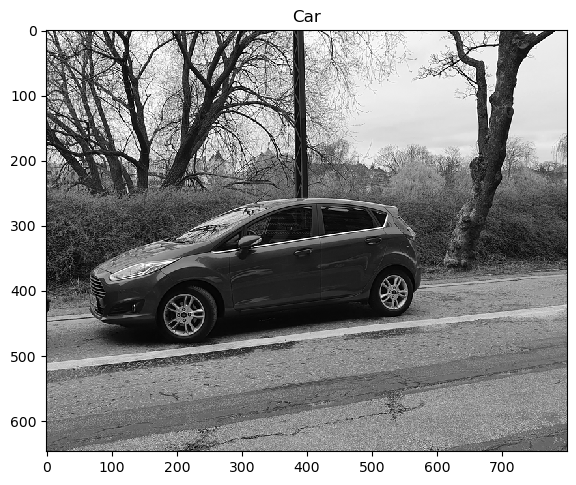

float64


In [24]:
im_org = io.imread(in_dir + 'car.png')
im_org = color.rgb2gray(im_org)

io.imshow(im_org)
plt.title('Car')
io.show()
print(im_org.dtype)

In [25]:
size = 10
footprint = np.ones([size, size])
med_img_10 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_10 = correlate(im_org, weights)

size = 20
footprint = np.ones([size, size])
med_img_20 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_20 = correlate(im_org, weights)

gauss_img_10 = gaussian(im_org, 10)
gauss_img_20 = gaussian(im_org, 20)

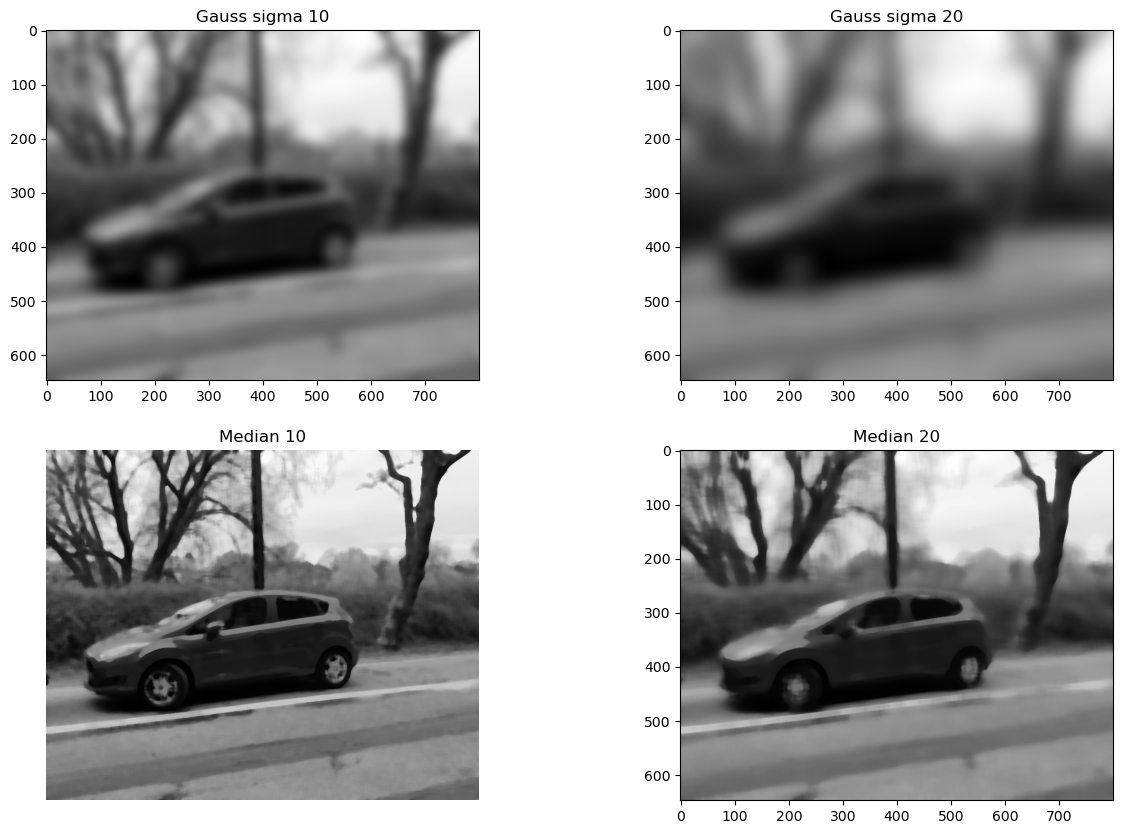

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

#ax[0,0].imshow(mean_img_10, cmap = 'gray')
#ax[0,0].set_title('Mean 10')
#ax[0,1].imshow(mean_img_20, cmap = 'gray')
#ax[0,1].set_title('Mean 20')
ax[0,0].imshow(gauss_img_10, cmap = 'gray')
ax[0,0].set_title('Gauss sigma 10')
ax[0,1].imshow(gauss_img_20, cmap = 'gray')
ax[0,1].set_title('Gauss sigma 20')
ax[1,0].set_axis_off()
ax[1,0].imshow(med_img_10, cmap = 'gray')
ax[1,0].set_title('Median 10')
ax[1,1].imshow(med_img_20, cmap = 'gray')
ax[1,1].set_title('Median 20')
plt.show()

## Exercise 8 - Edge filters

In [27]:
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from mpl_toolkits.axes_grid1 import make_axes_locatable

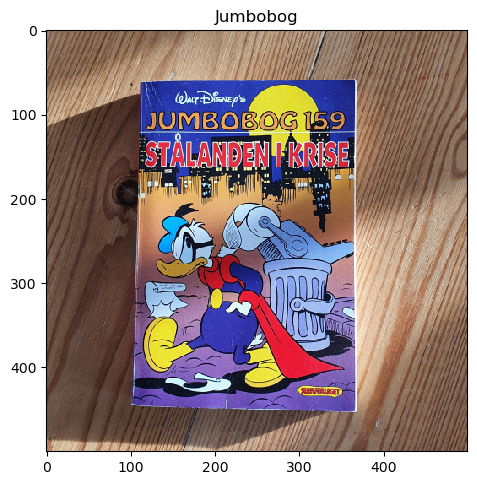

uint8


In [28]:
im_org = io.imread(in_dir + 'donald_1.png')
gray_img = color.rgb2gray(im_org)

io.imshow(im_org)
plt.title('Jumbobog')
io.show()
print(im_org.dtype)

In [29]:
prewitt_h_img = prewitt_h(gray_img)
prewitt_v_img = prewitt_v(gray_img)

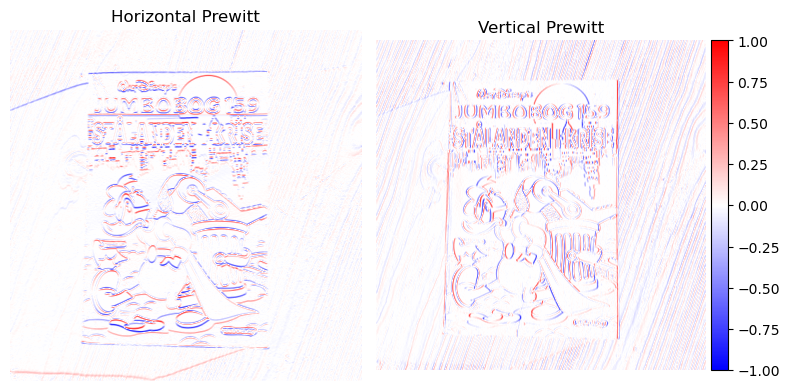

In [30]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(prewitt_h_img, cmap = 'bwr', vmin = -1, vmax = 1)
ax0.set_title("Horizontal Prewitt")
ax0.axis('off')
im = ax1.imshow(prewitt_v_img, cmap = 'bwr', vmin = -1, vmax = 1)
ax1.set_title("Vertical Prewitt")
ax1.axis('off')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

fig.tight_layout()
plt.show()

## Exercise 9

In [31]:
prewitt_img_color = prewitt(im_org)
prewitt_img_gray = prewitt(gray_img)

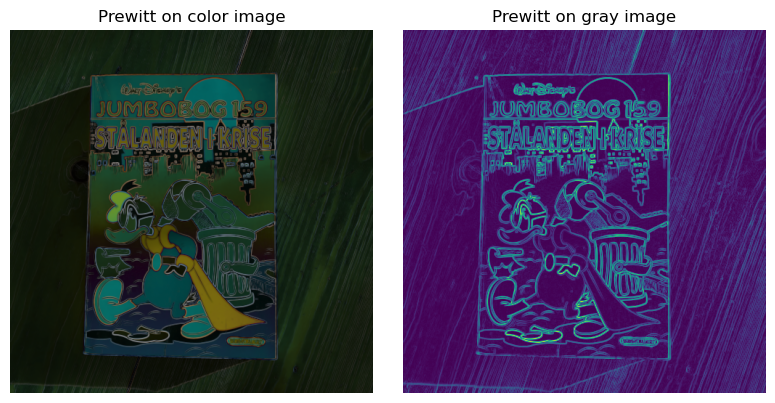

In [32]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))
ax0.imshow(prewitt_img_color)
ax0.set_title("Prewitt on color image")
ax0.axis('off')
ax1.imshow(prewitt_img_gray)
ax1.set_title("Prewitt on gray image")
ax1.axis('off')

fig.tight_layout()
plt.show()

## Exercise 10 - Edge detection in medical images

In [33]:
from skimage.filters import threshold_otsu

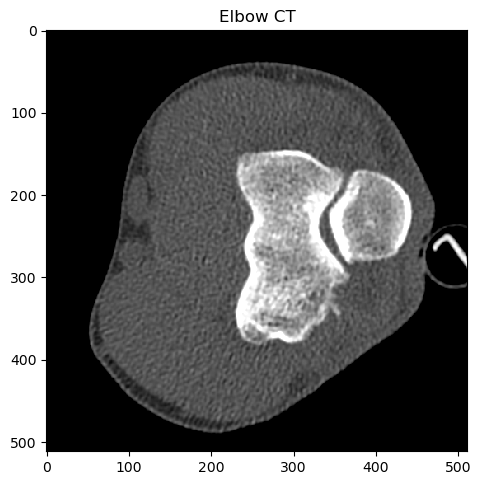

uint8


In [34]:
im_org = io.imread(in_dir + 'ElbowCTSlice.png')

io.imshow(im_org)
plt.title('Elbow CT')
io.show()
print(im_org.dtype)

In [35]:
size = 5
footprint = np.ones([size, size])
med_img_5 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_5 = correlate(im_org, weights)

size = 10
footprint = np.ones([size, size])
med_img_10 = median(im_org, footprint)
weights = np.ones([size, size])
weights = weights / np.sum(weights)
mean_img_10 = correlate(im_org, weights)

gauss_img_2 = gaussian(im_org, 2)
gauss_img_5 = gaussian(im_org, 5)
gauss_img_point_1 = gaussian(im_org, 0.1)

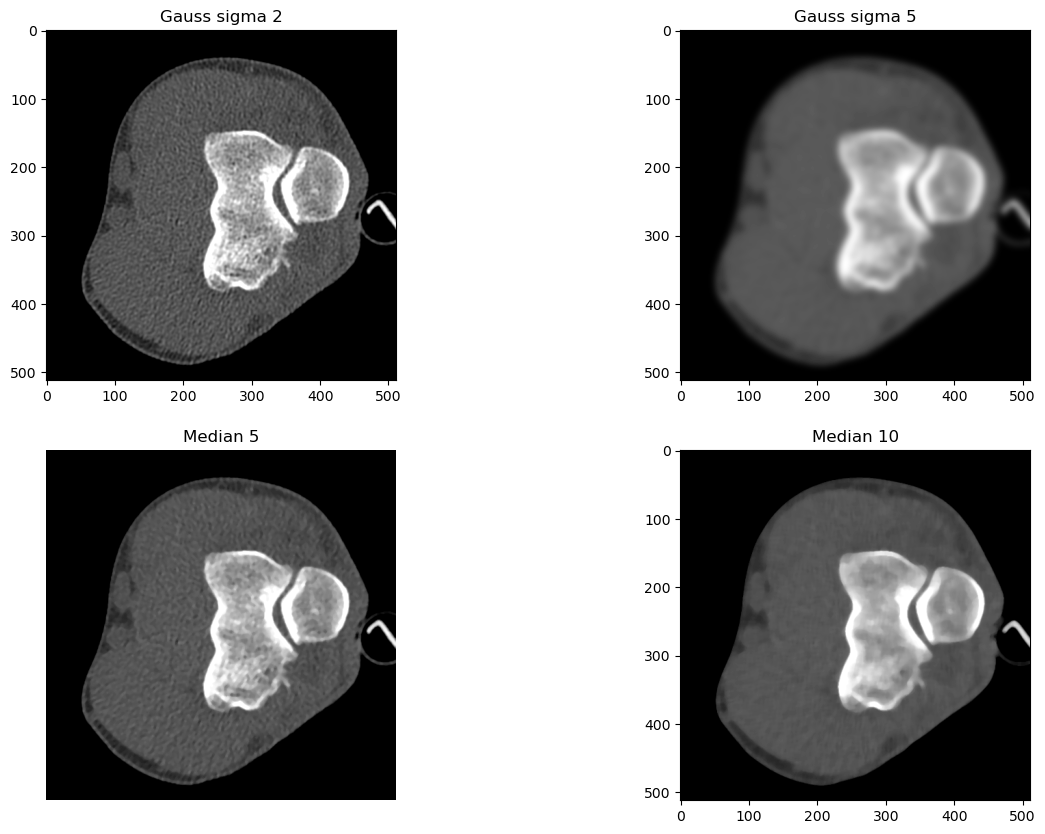

In [36]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

#ax[0,0].imshow(mean_img_10, cmap = 'gray')
#ax[0,0].set_title('Mean 10')
#ax[0,1].imshow(mean_img_20, cmap = 'gray')
#ax[0,1].set_title('Mean 20')
ax[0,0].imshow(gauss_img_point_1, cmap = 'gray')
ax[0,0].set_title('Gauss sigma 2')
ax[0,1].imshow(gauss_img_5, cmap = 'gray')
ax[0,1].set_title('Gauss sigma 5')
ax[1,0].set_axis_off()
ax[1,0].imshow(med_img_5, cmap = 'gray')
ax[1,0].set_title('Median 5')
ax[1,1].imshow(med_img_10, cmap = 'gray')
ax[1,1].set_title('Median 10')
plt.show()

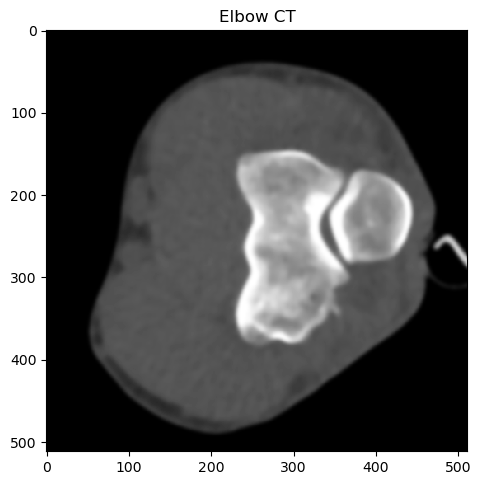

In [37]:
footprint = np.ones([10, 10])
gauss_5_med_10 = median(gauss_img_5, footprint)
med_10_gauss_5 = gaussian(med_img_10, 5)

gauss_2_med_10 = median(gauss_img_2, footprint)
med_10_gauss_2 = gaussian(med_img_10, 2)



io.imshow(med_10_gauss_2)
plt.title('Elbow CT')
io.show()

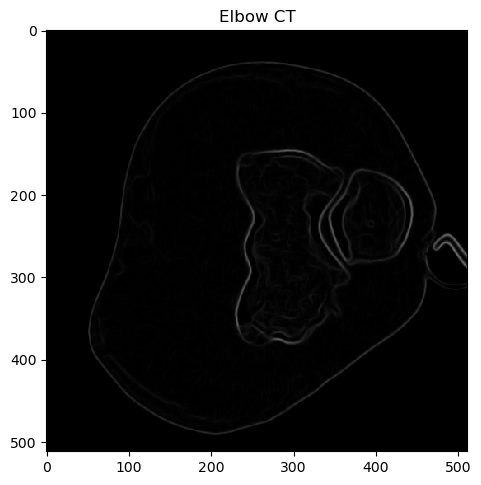

In [38]:
prewitt_img = prewitt(med_img_10)
io.imshow(prewitt_img)
plt.title('Elbow CT')
io.show()

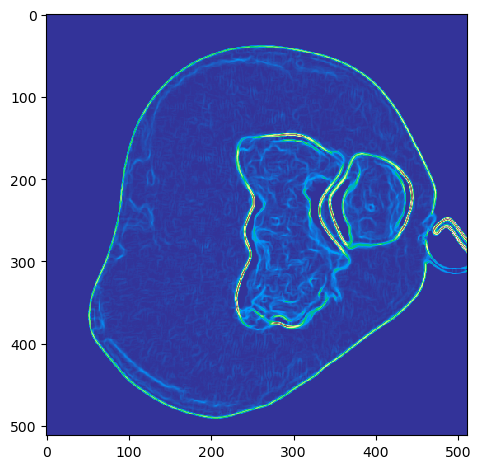

In [39]:
min_val = prewitt_img.min()
max_val = prewitt_img.max()
io.imshow(prewitt_img, vmin=min_val, vmax=max_val, cmap="terrain")

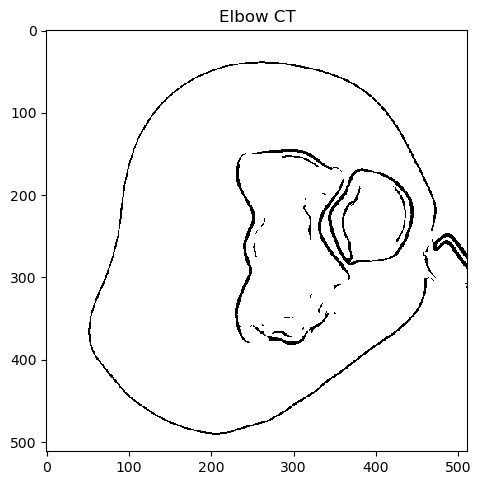

In [40]:
otsu_threshold = threshold_otsu(prewitt_img)

mask = prewitt_img < otsu_threshold
otsu_img = img_as_ubyte(mask)

io.imshow(otsu_img)
plt.title('Elbow CT')
io.show()

## Exercise 11 & 12 - Video filtering